In [23]:
print("Here we go again!")

Here we go again!


In [24]:
%pip install pandas numpy matplotlib seaborn ipython scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 774.6 kB/s  0:00:10m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 825.2 kB/s  0:00:25m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [25]:
# !/usr/bin/env python3

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys, json
from IPython.display import display


In [26]:
# Loading the file

df = pd.read_csv('final_dataset.csv')
print("Loaded shape:", df.shape)
df.head()

Loaded shape: (1461, 12)


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [27]:
# information about the datsets columns and everything
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [28]:
# statistical data
df.describe()


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


In [29]:
# checking if we have any null values in the dataset

df.isnull().sum()

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [31]:
# time-based operations (like trends, seasonality) are accurate
# converting “Date” column into proper datetime format

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1970-01-01 00:00:00.000000001,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,1970-01-01 00:00:00.000000002,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,1970-01-01 00:00:00.000000003,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,1970-01-01 00:00:00.000000004,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,1970-01-01 00:00:00.000000005,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [32]:
# creating a new feature named Season

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['Season'] = df['Month'].apply(get_season)
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,Season
0,1970-01-01 00:00:00.000000001,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,Winter
1,1970-01-01 00:00:00.000000002,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,Winter
2,1970-01-01 00:00:00.000000003,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,Winter
3,1970-01-01 00:00:00.000000004,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,Winter
4,1970-01-01 00:00:00.000000005,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,Winter


In [33]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [34]:
# handling outliers


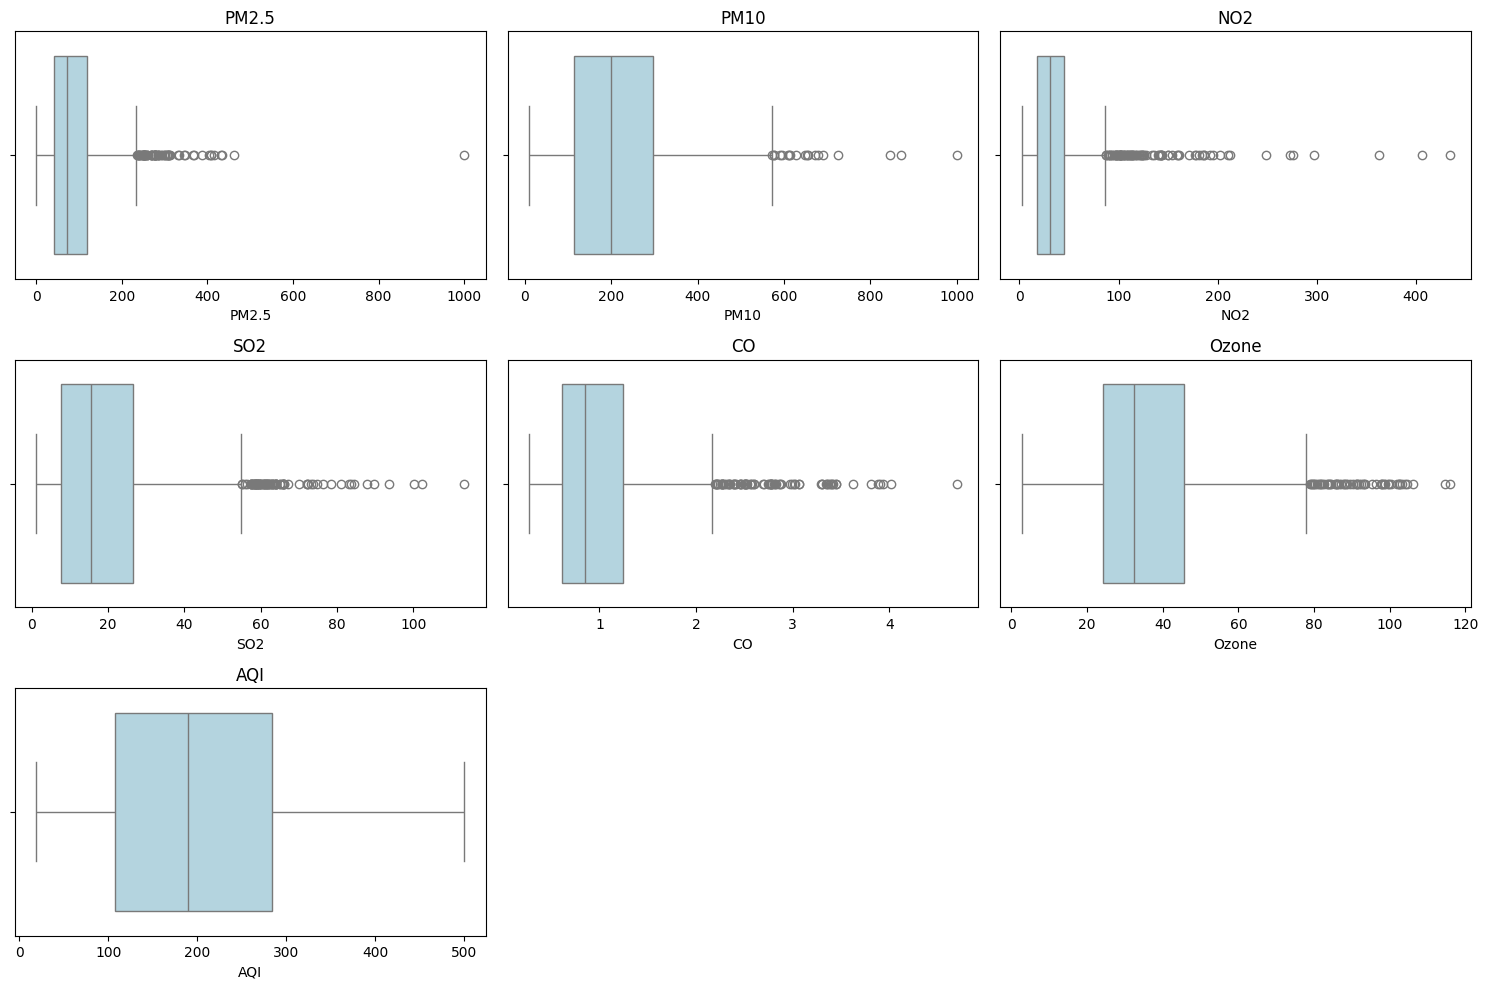

In [35]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']

plt.figure(figsize=(15,10))
for i, col in enumerate(pollutants, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [36]:
def treat_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

for col in pollutants:
    treat_outliers(col)

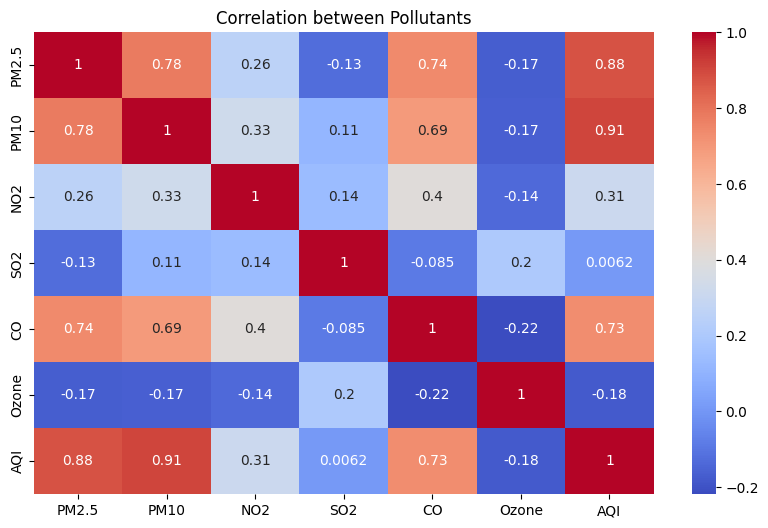

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df[pollutants].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Pollutants")
plt.show()

In [38]:
# feature engineering (we already made seasons now we make aqi_category)

In [39]:
def aqi_category(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

df['AQI_Category'] = df['AQI'].apply(aqi_category)


In [40]:
# scaling

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()

df_scaled[pollutants] = scaler.fit_transform(df_scaled[pollutants])
